In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}<style>"))

# cluster

In [3]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
import json
import random
import keras.backend as K
from keras.models import load_model
from sklearn.cluster import DBSCAN
import datetime

DATA_SHAPE = 224
val_labels = np.load('/home/mc16/pre_data/val_label_%s.npy'%DATA_SHAPE)
val_crf = np.load('/home/mc16/result/val_crf_06-14-06:32:46.npy')
test1_crf = np.load('/home/mc16/result/test1_crf_06-14-06:36:21.npy')

In [4]:
def matrix_to_point(matrix):
    points = []
    for x in range(matrix.shape[0]):
        for y in range(matrix.shape[1]):
            if(matrix[x][y] == 1):
                points.append([x, y])
    return np.array(points, dtype=np.uint8)

def get_cluster_points(points, EPS = 1.5, MIN_SAMPLES = 3, minN=20):
    if len(points) == 0: 
        cluster_points = []
    else:
        arpoints = np.array(points, dtype=np.uint8)
        cluster_label = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES).fit_predict(arpoints)
        max_label = np.max(cluster_label)
        cluster_points = []
        for label in range(-1, max_label+1):
            label_index = np.where(cluster_label == label)
            if(len(label_index[0]) > minN):
                cluster_points.append(arpoints[label_index])
    return np.array(cluster_points)

def cluster_to_img(cluster_points, shape):
    pic = np.zeros((shape, shape), np.uint8)
    num_label = cluster_points.shape[0]
    for i in range(num_label):
        for point in cluster_points[i]:
            pic[point[0], point[1]] = 50 + i * int((255 - 50) / num_label) 
    return pic

(1923, 1)


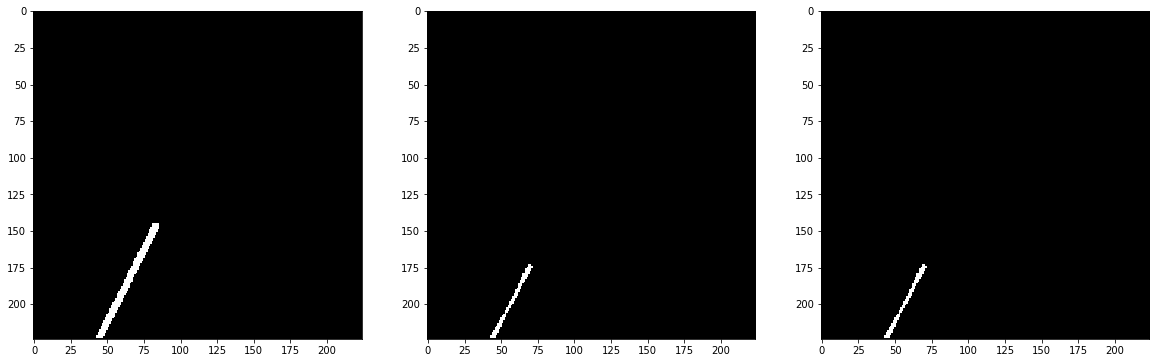

In [34]:
CLUSTER_EPS = 2.2
CLUSTER_MINN = 50

show_index = random.randint(0, len(val_labels))
# show_index = 885
show_label = val_labels[show_index,:,:,1]
show_crf = val_crf[show_index]
show_point = matrix_to_point(show_crf)
show_cluster = get_cluster_points(show_point, EPS = CLUSTER_EPS, MIN_SAMPLES = 3, minN = CLUSTER_MINN)
cluster_img = cluster_to_img(show_cluster, DATA_SHAPE)
fig, axs = plt.subplots(1, 3, figsize=(20,20)) 
axs[0].imshow(show_label, cmap='gray')
axs[1].imshow(show_crf, cmap='gray')
axs[2].imshow(cluster_img, cmap='gray')
print(show_index, len(show_cluster))
plt.show()

In [14]:
def get_cluster_list(crf_list):
    cluster_list = []
    for crf in tqdm(crf_list):
        point = matrix_to_point(crf)
        cluster = get_cluster_points(point, EPS = CLUSTER_EPS, MIN_SAMPLES = 3, minN=CLUSTER_MINN)
        cluster_list.append(cluster)
    return cluster_list

val_cluster = get_cluster_list(val_crf)
TIMEFORMAT = "%m-%d-%H:%M:%S"
time = datetime.datetime.now().strftime(TIMEFORMAT)
print(time)
np.save('/home/mc16/result/val_cluster_%s.npy'%time, val_cluster)

  9%|▉         | 178/2015 [00:05<00:54, 33.80it/s]Exception KeyError: KeyError(<weakref at 0x7f163e043fc8; to 'tqdm' at 0x7f163e139b10>,) in <object repr() failed> ignored


KeyboardInterrupt: 

In [42]:
test1_cluster = get_cluster_list(test1_crf)
TIMEFORMAT = "%m-%d-%H:%M:%S"
time = datetime.datetime.now().strftime(TIMEFORMAT)
print(time)
np.save('/home/mc16/result/test1_cluster_%s.npy'%time, test1_cluster)


100%|██████████| 2034/2034 [01:07<00:00, 30.12it/s]

06-14-06:41:52


# Save json

In [40]:
def np2json(arlines):
    json_lines = []
    for arline in arlines:
        json_line = []
        for point in arline:
            json_line.append({"x":int(point[1]), "y":int(point[0])})
        json_lines.append(json_line)
    return {"Lanes": json_lines}

def save_jsons(lines_list, list_path, json_path):
    test_md5_paths = open(list_path, 'r').readlines()
    for i, lines in tqdm(enumerate(lines_list)):
        md5 = test_md5_paths[i].split('.')[0]
        lines_json = np2json(lines)
        lines_str = json.dumps(lines_json)
        file = open(json_path + '%s.json'%md5,'w')
        file.write(lines_str)
        file.close()
        
val_list_path = '/data/mc_data/MLDC/data/val/list.txt'
val_json_path = '/home/mc16/result_json/val_results/'
save_jsons(val_cluster, val_list_path, val_json_path)


0it [00:00, ?it/s]
36it [00:00, 352.67it/s]
72it [00:00, 351.62it/s]
102it [00:00, 333.57it/s]
141it [00:00, 346.45it/s]
181it [00:00, 356.26it/s]
218it [00:00, 358.45it/s]
256it [00:00, 360.55it/s]
302it [00:00, 372.67it/s]
350it [00:00, 384.34it/s]
408it [00:01, 403.42it/s]
454it [00:01, 392.21it/s]
496it [00:01, 386.65it/s]
536it [00:01, 382.74it/s]
582it [00:01, 387.67it/s]
625it [00:01, 388.99it/s]
666it [00:01, 387.45it/s]
707it [00:01, 388.34it/s]
751it [00:01, 390.99it/s]
796it [00:02, 393.54it/s]
843it [00:02, 397.14it/s]
896it [00:02, 402.96it/s]
955it [00:02, 410.52it/s]
1005it [00:02, 413.43it/s]
1061it [00:02, 418.65it/s]
1112it [00:02, 419.59it/s]
1165it [00:02, 423.51it/s]
1215it [00:02, 425.66it/s]
1265it [00:02, 426.31it/s]
1313it [00:03, 417.61it/s]
1355it [00:03, 412.27it/s]
1398it [00:03, 412.45it/s]
1438it [00:03, 410.94it/s]
1478it [00:03, 410.52it/s]
1521it [00:03, 410.62it/s]
1568it [00:03, 412.04it/s]
1612it [00:03, 412.68it/s]
1666it [00:04, 415.78it/s]
1720i

In [41]:
!python /home/mc16/evalue.py

2015it [01:24, 23.74it/s]
{'f1': 0.5813714050380946, 'code': 0, 'precision': 0.6214233308877476, 'recall': 0.5461697188547846}
